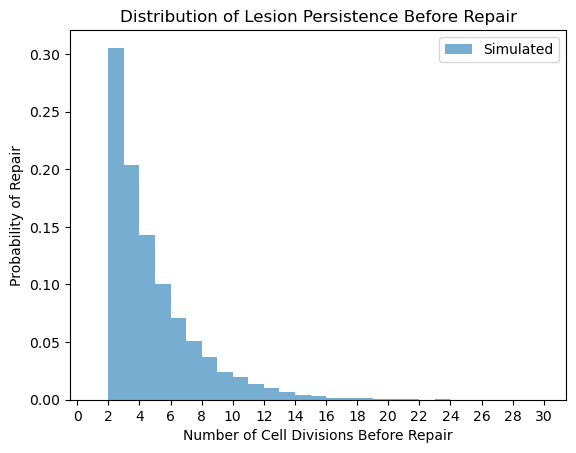

Mean persistence: 4.38
Variance of persistence: 8.15


In [80]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_DNA_lesion_persistence(p, n_simulations=1000):
    persistence_duration = []  # List to store number of divisions before repair
    
    for _ in range(n_simulations):  # Run n_simulations independent experiments
        divisions = 1   # lesion already survived one division
        while True:
            divisions += 1
            if np.random.rand() < p:  # repair occurs with probability p
                break
        persistence_duration.append(divisions)
    
    return persistence_duration

# Example usage:
p = 0.3  # Repair probability
results = simulate_DNA_lesion_persistence(p, 10000)

# Plot histogram
plt.hist(results, bins=range(1, max(results)+1), density=True, alpha=0.6, label='Simulated')
plt.title("Distribution of Lesion Persistence Before Repair")
plt.xlabel("Number of Cell Divisions Before Repair")
plt.ylabel("Probability of Repair")

# Force x-axis ticks to increments of 2
plt.xticks(np.arange(0, max(results)+2, 2))

plt.legend()
plt.show()

# Compute statistics
mean_persistence = np.mean(results)
variance_persistence = np.var(results)

print(f"Mean persistence: {mean_persistence:.2f}")
print(f"Variance of persistence: {variance_persistence:.2f}")


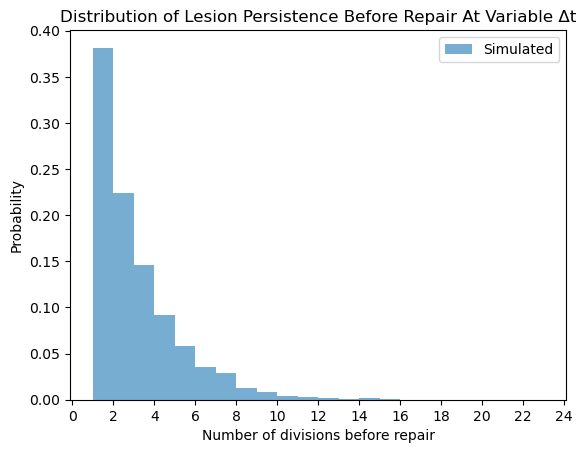

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

rng = np.random.default_rng()

# Parameters
nTrials = 5000
mitRate = 0.5 # division rate (λ)
rho = 0.3      # repair rate

# Exponential-based repair probability 
def repair_probability(rho, deltaT):
    return 1 - np.exp(-rho * deltaT)

# experiment: track divisions until repair or end time
def experiment_with_repair(mitRate, T, rho):
    t = 0
    nDivisions = 1
    
    while True:
        deltaT = rng.exponential(1 / mitRate)
        t += deltaT #t+divisiontime
        
       
         # Check for repair (Bernoulli trial)
        if rng.uniform() < repair_probability(rho, deltaT): #Generates a random number between 0 and 1, “With this probability, the repair occurs.”
            
            break
        
        nDivisions += 1  # no repair, continue
    
    return nDivisions

# Run trials
experimentResults = [experiment_with_repair(mitRate, T, rho) for _ in range(nTrials)] #Repeat the division + repair process nTrials times. 

# Plot histogram
plt.hist(experimentResults, bins=range(1, max(experimentResults)+1), density=True, alpha=0.6, label='Simulated')


plt.xlabel("Number of divisions before repair")
plt.ylabel("Probability")
plt.title("Distribution of Lesion Persistence Before Repair At Variable Δt")
plt.legend()

# Force x-axis ticks to increments of 2
plt.xticks(np.arange(0, max(experimentResults)+2, 2))

plt.show()



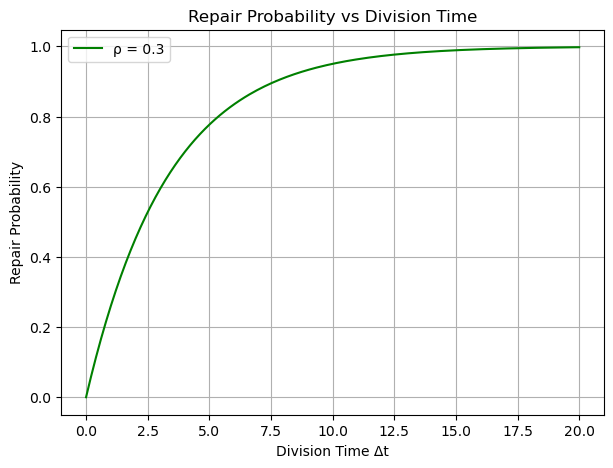

In [26]:
# Time range (possible division times)
deltaT_range = np.linspace(0, 20, 200)

# Corresponding repair probabilities
repair_probs = [repair_probability(rho, deltaT) for deltaT in deltaT_range]

plt.figure(figsize=(7, 5))
plt.plot(deltaT_range, repair_probs, label=f'ρ = {rho}', color='green')
plt.xlabel("Division Time Δt")
plt.ylabel("Repair Probability")
plt.title("Repair Probability vs Division Time")
plt.grid(True)
plt.legend()
plt.show()


Model A (fixed ΔT, per-division Bernoulli):
  Mean     = 1.209800
  Variance = 2.662984

Model B (Continuous, Exp interdivision times):
  Mean     = 1.684000
  Variance = 4.680544


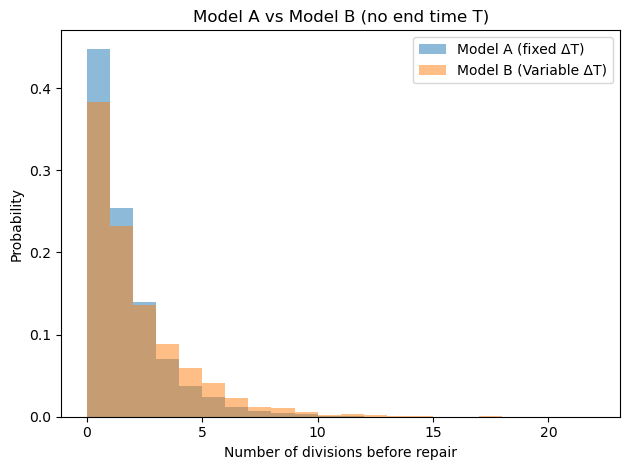

In [12]:
import random
import statistics
from math import exp
import matplotlib.pyplot as plt

nTrials = 5000   # number of simulated cells
mitRate = 0.5    # division rate (λ)
rho = 0.3        # repair rate

# Model A (fixed ΔT)
def modelA_counts(nTrials, mitRate, rho):
    dT = 1.0 / mitRate  # Fixed interdivision time
    p = 1.0 - exp(-rho * dT)  # Per-division repair probability

    results = []
    for _ in range(nTrials):
        nDivisions = 0
        while True:
            if random.random() < p:  # repair happens
                break
            nDivisions += 1
        results.append(nDivisions)
    return results

# Model B (Variable ΔT)
def modelB_counts(nTrials, mitRate, rho):
    results = []
    for _ in range(nTrials):
        nDivisions = 0
        while True:
            dt = random.expovariate(mitRate)  # interdivision gap
            if random.random() < (1.0 - exp(-rho * dt)):  # repair in this gap
                break
            nDivisions += 1
        results.append(nDivisions)
    return results

# Run both models
mA = modelA_counts(nTrials, mitRate, rho)
mB = modelB_counts(nTrials, mitRate, rho)

# Print mean & variance
print("Model A (fixed ΔT, per-division Bernoulli):")
print(f"  Mean     = {statistics.mean(mA):.6f}")
print(f"  Variance = {statistics.pvariance(mA):.6f}")

print("\nModel B (Continuous, Exp interdivision times):")
print(f"  Mean     = {statistics.mean(mB):.6f}")
print(f"  Variance = {statistics.pvariance(mB):.6f}")

# Histogram (overlay)
bins = range(min(min(mA), min(mB)), max(max(mA), max(mB)) + 2)
plt.hist(mA, bins=bins, density=True, alpha=0.5, label='Model A (fixed ΔT)')
plt.hist(mB, bins=bins, density=True, alpha=0.5, label='Model B (Variable ΔT)')
plt.xlabel("Number of divisions before repair")
plt.ylabel("Probability")
plt.title("Model A vs Model B (no end time T)")
plt.legend()
plt.tight_layout()
plt.show()


Model A (fixed ΔT, per-division Bernoulli):
  Mean     = 1.212200
  Variance = 2.597571

Model B (Continuous, Exp interdivision times):
  Mean     = 1.655000
  Variance = 4.367175


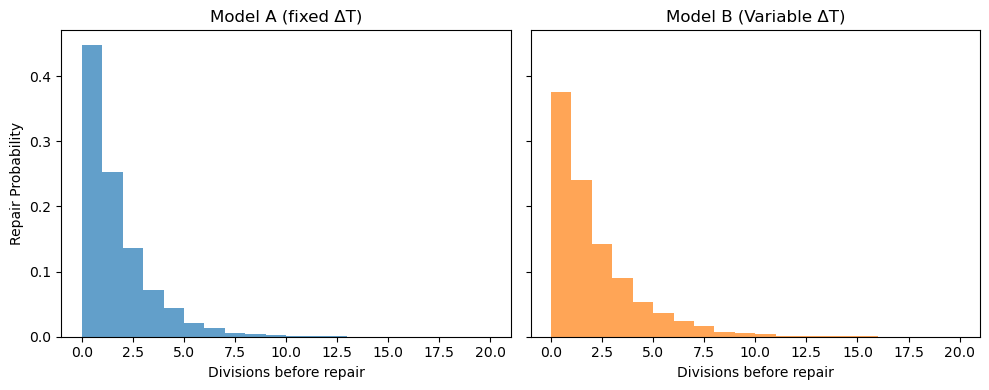

In [84]:
import random
import statistics
from math import exp
import matplotlib.pyplot as plt

nTrials = 5000   # number of simulated cells
mitRate = 0.5    # division rate (λ)
rho = 0.3        # repair rate

# Model A (fixed ΔT)
def modelA_counts(nTrials, mitRate, rho):
    dT = 1.0 / mitRate  # Fixed interdivision time
    p = 1.0 - exp(-rho * dT)  # Per-division repair probability

    results = []
    for _ in range(nTrials):
        nDivisions = 0
        while True:
            if random.random() < p:  # repair happens
                break
            nDivisions += 1
        results.append(nDivisions)
    return results

# Model B (Variable ΔT)  
def modelB_counts(nTrials, mitRate, rho):
    results = []
    for _ in range(nTrials):
        nDivisions = 0
        while True:
            dt = random.expovariate(mitRate)  # interdivision gap
            if random.random() < (1.0 - exp(-rho * dt)):  # repair in this gap
                break
            nDivisions += 1
        results.append(nDivisions)
    return results

# Run both models
mA = modelA_counts(nTrials, mitRate, rho)
mB = modelB_counts(nTrials, mitRate, rho)

# Print mean & variance
print("Model A (fixed ΔT, per-division Bernoulli):")
print(f"  Mean     = {statistics.mean(mA):.6f}")
print(f"  Variance = {statistics.pvariance(mA):.6f}")

print("\nModel B (Continuous, Exp interdivision times):")
print(f"  Mean     = {statistics.mean(mB):.6f}")
print(f"  Variance = {statistics.pvariance(mB):.6f}")

# Side-by-side histograms
bins = range(min(min(mA), min(mB)), max(max(mA), max(mB)) + 2)

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axes[0].hist(mA, bins=bins, density=True, alpha=0.7, color='tab:blue')
axes[0].set_title("Model A (fixed ΔT)")
axes[0].set_xlabel("Divisions before repair")
axes[0].set_ylabel("Repair Probability")

axes[1].hist(mB, bins=bins, density=True, alpha=0.7, color='tab:orange')
axes[1].set_title("Model B (Variable ΔT)")
axes[1].set_xlabel("Divisions before repair")

plt.tight_layout()
plt.show()


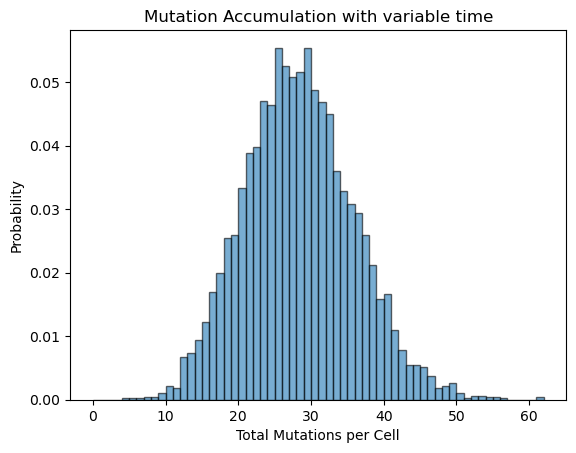

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Random generator
rng = np.random.default_rng()

# Parameters
nTrials = 5000
mitRate = 0.5         # Division rate (λ)
T = 50                # end time
lesionRate = 2      # Lesions per unit time
rho = 0.3             # Repair rate (per time step)

def simulate_cell(mitRate, T, lesionRate, rho):
    t = 0
    mutations = 0
    totallesion = 0  # Lesions carried over from previous cycles

    while t < T:
        # Time to next division (cell cycle length)
        deltaT = rng.exponential(1 / mitRate)
        t += deltaT
        
        if t > T:
            break  # end time reached

        # 1: Lesion accumulation & repair before replication ---
        # New lesions arise during this cell cycle (Poisson process)
        new_lesions = rng.poisson(lesionRate * deltaT)
        totallesion += new_lesions

        # Repair existing lesions (each has probability 1 - e^(-rho * deltaT) to be repaired)
        # (Exponential repair process)
        repaired_lesions = rng.binomial(totallesion, 1 - np.exp(-rho * deltaT))
        totallesion -= repaired_lesions

        # 2: Genome replication (50/50 chance for lesions to become mutations) ---
        # For each remaining lesion, flip a coin:
        # 50% chance: becomes a mutation (removed from totallesion)
        # 50% chance: remains a lesion (carried to next cycle)
        lesions_becoming_mutations = rng.binomial(totallesion, 0.5)
        mutations += lesions_becoming_mutations
        totallesion -= lesions_becoming_mutations

    return mutations

# Run simulation across many trials
mutation_counts = [simulate_cell(mitRate, T, lesionRate, rho) for _ in range(nTrials)]

# Plot histogram
plt.hist(mutation_counts, bins=range(0, max(mutation_counts) + 1), density=True, alpha=0.6, edgecolor='black')
plt.xlabel("Total Mutations per Cell")
plt.ylabel("Probability")
plt.title("Mutation Accumulation with variable time")
plt.show()

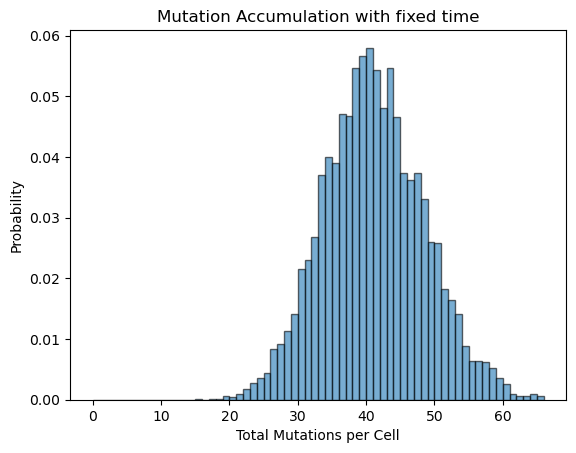

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Random generator
rng = np.random.default_rng()

# Parameters
nTrials = 5000
mitRate = 0.5         # Division rate (λ) per unit time
T = 50                # Total simulation time
lesionRate = 2.0      # Lesions per unit time
rho = 0.3             # Repair rate per time step
dt = 1.0              # Fixed time step (e.g., 1 unit of time)

def simulate_cell_fixed_time(mitRate, T, lesionRate, rho, dt):
    t = 0
    mutations = 0
    totallesion = 0

    while t < T:
        t += dt

        # 1: Lesion accumulation & repair before replication ---
        new_lesions = rng.poisson(lesionRate * dt)
        totallesion += new_lesions

        # Repair lesions
        repaired_lesions = rng.binomial(totallesion, 1 - np.exp(-rho * dt))
        totallesion -= repaired_lesions

        # 2: Replication occurs probabilistically based on mitRate per time step
        if rng.random() < mitRate * dt:
            # Lesions may become mutations
            lesions_becoming_mutations = rng.binomial(totallesion, 0.5)
            mutations += lesions_becoming_mutations
            totallesion -= lesions_becoming_mutations

    return mutations

# Run simulation across many trials
mutation_counts = [simulate_cell_fixed_time(mitRate, T, lesionRate, rho, dt) for _ in range(nTrials)]

# Plot histogram
plt.hist(mutation_counts, bins=range(0, max(mutation_counts) + 1), density=True, alpha=0.6, edgecolor='black')
plt.xlabel("Total Mutations per Cell")
plt.ylabel("Probability")
plt.title("Mutation Accumulation with fixed time")
plt.show()


Model A (Variable time)
Mean mutations   = 27.7058
Variance         = 55.71604635999999


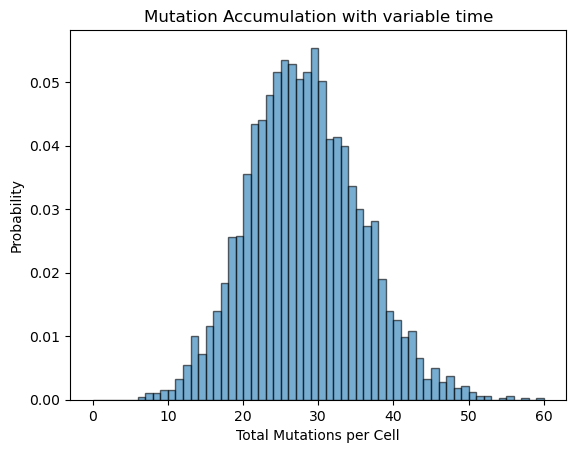


Model B (Fixed time)
Mean mutations   = 40.713
Variance         = 52.701831000000006


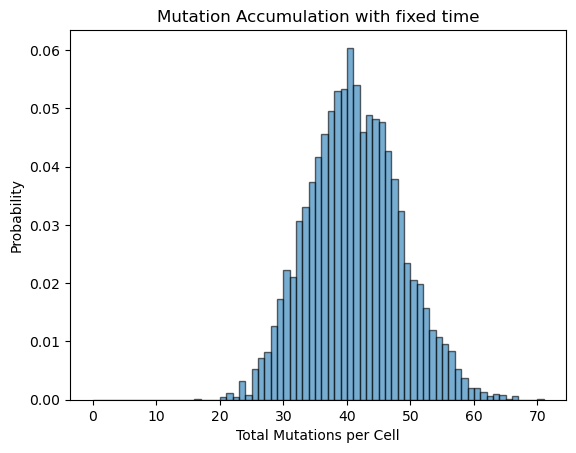

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Random generator
rng = np.random.default_rng()

# Parameters
nTrials = 5000
mitRate = 0.5         # Division rate (λ)
T = 50                # end time
lesionRate = 2        # Lesions per unit time
rho = 0.3             # Repair rate (per time step)

def simulate_cell(mitRate, T, lesionRate, rho):
    t = 0
    mutations = 0
    totallesion = 0  # Lesions carried over from previous cycles

    while t < T:
        # Time to next division (cell cycle length)
        deltaT = rng.exponential(1 / mitRate)
        t += deltaT
        
        if t > T:
            break  # end time reached

        # 1: Lesion accumulation & repair before replication ---
        new_lesions = rng.poisson(lesionRate * deltaT)
        totallesion += new_lesions

        repaired_lesions = rng.binomial(totallesion, 1 - np.exp(-rho * deltaT))
        totallesion -= repaired_lesions

        # 2: Genome replication
        lesions_becoming_mutations = rng.binomial(totallesion, 0.5)
        mutations += lesions_becoming_mutations
        totallesion -= lesions_becoming_mutations

    return mutations

# Run simulation (Model A: variable time)
mutation_counts_var = [simulate_cell(mitRate, T, lesionRate, rho) for _ in range(nTrials)]

# Stats for Model A
print("Model A (Variable time)")
print("Mean mutations   =", np.mean(mutation_counts_var))
print("Variance         =", np.var(mutation_counts_var))

# Plot histogram
plt.hist(mutation_counts_var, bins=range(0, max(mutation_counts_var) + 1),
         density=True, alpha=0.6, edgecolor='black')
plt.xlabel("Total Mutations per Cell")
plt.ylabel("Probability")
plt.title("Mutation Accumulation with variable time")
plt.show()


# ----------------- Model B -----------------

# Parameters
dt = 1.0  # Fixed time step

def simulate_cell_fixed_time(mitRate, T, lesionRate, rho, dt):
    t = 0
    mutations = 0
    totallesion = 0

    while t < T:
        t += dt

        # Lesion accumulation
        new_lesions = rng.poisson(lesionRate * dt)
        totallesion += new_lesions

        # Repair lesions
        repaired_lesions = rng.binomial(totallesion, 1 - np.exp(-rho * dt))
        totallesion -= repaired_lesions

        # Replication probabilistic
        if rng.random() < mitRate * dt:
            lesions_becoming_mutations = rng.binomial(totallesion, 0.5)
            mutations += lesions_becoming_mutations
            totallesion -= lesions_becoming_mutations

    return mutations

# Run simulation (Model B: fixed time)
mutation_counts_fix = [simulate_cell_fixed_time(mitRate, T, lesionRate, rho, dt) for _ in range(nTrials)]

# Stats for Model B
print("\nModel B (Fixed time)")
print("Mean mutations   =", np.mean(mutation_counts_fix))
print("Variance         =", np.var(mutation_counts_fix))

# Plot histogram
plt.hist(mutation_counts_fix, bins=range(0, max(mutation_counts_fix) + 1),
         density=True, alpha=0.6, edgecolor='black')
plt.xlabel("Total Mutations per Cell")
plt.ylabel("Probability")
plt.title("Mutation Accumulation with fixed time")
plt.show()


Slope (mutations/year) ≈ 17.21


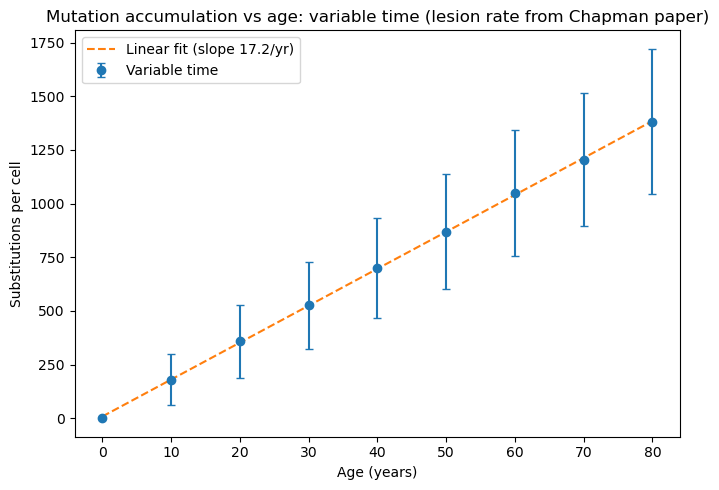

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Random generator
rng = np.random.default_rng()

# Parameters
nTrials    = 5000
mitRate    = 1.0        # Divisions per year
lesionRate = 2920        # Lesions per year (tune to match slope ~17.0/yr)
rho        = 8.5        # Repair rate per year (tune)
ages       = [0, 10, 20, 30, 40, 50, 60, 70, 80]  # Years

def simulate_cell(mitRate, T, lesionRate, rho):
    t = 0
    mutations = 0
    totallesion = 0  # Lesions carried over from previous cycles

    while t < T:
        # Time to next division (cell cycle length)
        deltaT = rng.exponential(1 / mitRate)
        t += deltaT
        if t > T:
            break  # end time reached

        # Lesion accumulation
        new_lesions = rng.poisson(lesionRate * deltaT)
        totallesion += new_lesions

        # Repair
        repaired_lesions = rng.binomial(totallesion, 1 - np.exp(-rho * deltaT))
        totallesion -= repaired_lesions

        # Replication: half of remaining lesions become mutations
        lesions_becoming_mutations = rng.binomial(totallesion, 0.5)
        mutations += lesions_becoming_mutations
        totallesion -= lesions_becoming_mutations

    return mutations

# ---- Run simulation across ages ----
means, stds = [], []
for T in ages:
    mutation_counts = [simulate_cell(mitRate, T, lesionRate, rho) for _ in range(nTrials)]
    means.append(np.mean(mutation_counts))
    stds.append(np.std(mutation_counts, ddof=1))

# ---- Linear regression fit ----
coef = np.polyfit(ages, means, 1)   # slope and intercept
fit_line = np.polyval(coef, ages)
print(f"Slope (mutations/year) ≈ {coef[0]:.2f}")

# ---- Plot ----
plt.figure(figsize=(7,5))

# Lesion-repair model
plt.errorbar(ages, means, yerr=stds, fmt='o', capsize=3, label="Variable time")

# Linear regression fit
plt.plot(ages, fit_line, '--', label=f"Linear fit (slope {coef[0]:.1f}/yr)")

plt.xlabel("Age (years)")
plt.ylabel("Substitutions per cell")
plt.title("Mutation accumulation vs age: variable time (lesion rate from Chapman paper)")
plt.legend()
plt.tight_layout()
plt.show()


Slope (mutations/year) ≈ 2.21


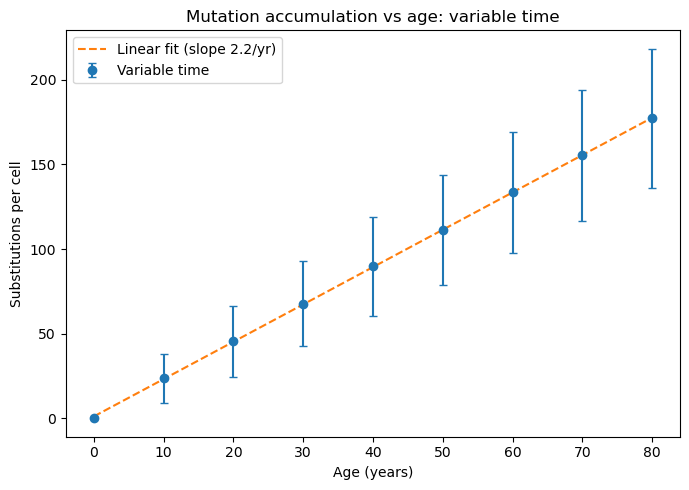

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Random generator
rng = np.random.default_rng()

# Parameters
nTrials    = 5000
mitRate    = 1.0        # Divisions per year
lesionRate = 200        # Lesions per year (tune to match slope ~17.0/yr)
rho        = 6.0        # Repair rate per year (tune)
ages       = [0, 10, 20, 30, 40, 50, 60, 70, 80]  # Years

def simulate_cell(mitRate, T, lesionRate, rho):
    t = 0
    mutations = 0
    totallesion = 0  # Lesions carried over from previous cycles

    while t < T:
        # Time to next division (cell cycle length)
        deltaT = rng.exponential(1 / mitRate)
        t += deltaT
        if t > T:
            break  # end time reached

        # Lesion accumulation
        new_lesions = rng.poisson(lesionRate * deltaT)
        totallesion += new_lesions

        # Repair
        repaired_lesions = rng.binomial(totallesion, 1 - np.exp(-rho * deltaT))
        totallesion -= repaired_lesions

        # Replication: half of remaining lesions become mutations
        lesions_becoming_mutations = rng.binomial(totallesion, 0.5)
        mutations += lesions_becoming_mutations
        totallesion -= lesions_becoming_mutations

    return mutations

# ---- Run simulation across ages ----
means, stds = [], []
for T in ages:
    mutation_counts = [simulate_cell(mitRate, T, lesionRate, rho) for _ in range(nTrials)]
    means.append(np.mean(mutation_counts))
    stds.append(np.std(mutation_counts, ddof=1))

# ---- Linear regression fit ----
coef = np.polyfit(ages, means, 1)   # slope and intercept
fit_line = np.polyval(coef, ages)
print(f"Slope (mutations/year) ≈ {coef[0]:.2f}")

# ---- Plot ----
plt.figure(figsize=(7,5))

# Lesion-repair model
plt.errorbar(ages, means, yerr=stds, fmt='o', capsize=3, label="Variable time")

# Linear regression fit
plt.plot(ages, fit_line, '--', label=f"Linear fit (slope {coef[0]:.1f}/yr)")

plt.xlabel("Age (years)")
plt.ylabel("Substitutions per cell")
plt.title("Mutation accumulation vs age: variable time")
plt.legend()
plt.tight_layout()
plt.show()


Slope (mutations/year) ≈ 15.31


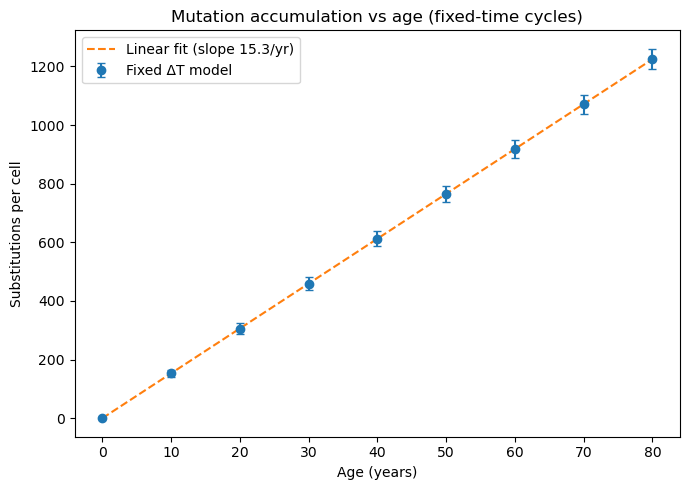

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Random generator
rng = np.random.default_rng()

# Parameters
nTrials    = 5000
mitRate    = 1.0        # Divisions per year
lesionRate = 600        # Lesions per year (tune to match slope ~17/yr)
rho        = 3.0        # Repair rate per year (tune)
ages       = [0, 12, 22, 32, 42, 52, 62, 72, 82]  # Years

def simulate_cell_fixed(mitRate, T, lesionRate, rho):
    t = 0.0
    mutations = 0
    totallesion = 0  # lesions carried over between cycles
    deltaT = 1.0 / mitRate  # fixed cycle length

    while t < T:
        t += deltaT
        if t > T:
            break  # end time reached

        # Lesion accumulation during this cycle
        new_lesions = rng.poisson(lesionRate * deltaT)
        totallesion += new_lesions

        # Repair during this cycle
        repaired_lesions = rng.binomial(totallesion, 1 - np.exp(-rho * deltaT))
        totallesion -= repaired_lesions

        # Replication: 50% of remaining lesions become fixed mutations
        lesions_becoming_mutations = rng.binomial(totallesion, 0.5)
        mutations += lesions_becoming_mutations
        totallesion -= lesions_becoming_mutations

    return mutations

# ---- Run simulation across ages ----
means, stds = [], []
for T in ages:
    mutation_counts = [simulate_cell_fixed(mitRate, T, lesionRate, rho) for _ in range(nTrials)]
    means.append(np.mean(mutation_counts))
    stds.append(np.std(mutation_counts, ddof=1))

# ---- Linear regression fit ----
coef = np.polyfit(ages, means, 1)   # slope and intercept
fit_line = np.polyval(coef, ages)
print(f"Slope (mutations/year) ≈ {coef[0]:.2f}")

# ---- Plot mean ± error bars with regression ----
plt.figure(figsize=(7,5))
plt.errorbar(ages, means, yerr=stds, fmt='o', capsize=3, label="Fixed ΔT model")
plt.plot(ages, fit_line, '--', label=f"Linear fit (slope {coef[0]:.1f}/yr)")

plt.xlabel("Age (years)")
plt.ylabel("Substitutions per cell")
plt.title("Mutation accumulation vs age (fixed-time cycles)")
plt.legend()
plt.tight_layout()
plt.show()


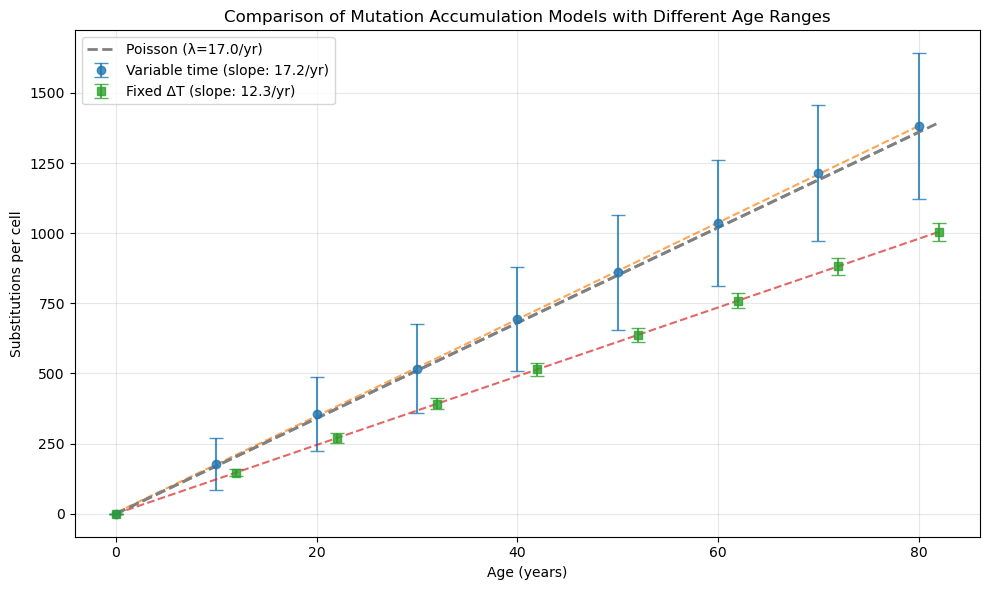

Variable time model slope: 17.24 mutations/year
Fixed time model slope: 12.25 mutations/year
Poisson process rate: λ = 17.00 mutations/year
Variable time ages: [ 0 10 20 30 40 50 60 70 80]
Fixed time ages: [ 0 12 22 32 42 52 62 72 82]


In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Random generator
rng = np.random.default_rng()

# Parameters
nTrials = 5000
mitRate = 1.0        # Divisions per year
lesionRate_var = 480  # Lesions per year for variable time model
lesionRate_fixed = 480  # Lesions per year for fixed time model
rho_var = 3.0        # Repair rate per year for variable time model
rho_fixed = 3.0      # Repair rate per year for fixed time model

# Different age ranges for each model
ages_var = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80])  # Years for variable time
ages_fixed = np.array([0, 12, 22, 32, 42, 52, 62, 72, 82])  # Years for fixed time

# Poisson process parameter
lambda_poisson = 17.0

def simulate_cell_variable(mitRate, T, lesionRate, rho):
    t = 0
    mutations = 0
    totallesion = 0  # Lesions carried over from previous cycles

    while t < T:
        # Time to next division (cell cycle length)
        deltaT = rng.exponential(1 / mitRate)
        t += deltaT
        if t > T:
            break  # end time reached

        # Lesion accumulation
        new_lesions = rng.poisson(lesionRate * deltaT)
        totallesion += new_lesions

        # Repair
        repaired_lesions = rng.binomial(totallesion, 1 - np.exp(-rho * deltaT))
        totallesion -= repaired_lesions

        # Replication: half of remaining lesions become mutations
        lesions_becoming_mutations = rng.binomial(totallesion, 0.5)
        mutations += lesions_becoming_mutations
        totallesion -= lesions_becoming_mutations

    return mutations

def simulate_cell_fixed(mitRate, T, lesionRate, rho):
    t = 0.0
    mutations = 0
    totallesion = 0  # lesions carried over between cycles
    deltaT = 1.0 / mitRate  # fixed cycle length

    while t < T:
        t += deltaT
        if t > T:
            break  # end time reached

        # Lesion accumulation during this cycle
        new_lesions = rng.poisson(lesionRate * deltaT)
        totallesion += new_lesions

        # Repair during this cycle
        repaired_lesions = rng.binomial(totallesion, 1 - np.exp(-rho * deltaT))
        totallesion -= repaired_lesions

        # Replication: 50% of remaining lesions become fixed mutations
        lesions_becoming_mutations = rng.binomial(totallesion, 0.5)
        mutations += lesions_becoming_mutations
        totallesion -= lesions_becoming_mutations

    return mutations

# ---- Run simulations ----
means_var, stds_var = np.array([]), np.array([])
means_fixed, stds_fixed = np.array([]), np.array([])

# Variable time model simulation
for T in ages_var:
    mutation_counts_var = [simulate_cell_variable(mitRate, T, lesionRate_var, rho_var) for _ in range(nTrials)]
    means_var = np.append(means_var, np.mean(mutation_counts_var))
    stds_var = np.append(stds_var, np.std(mutation_counts_var, ddof=1))

# Fixed time model simulation
for T in ages_fixed:
    mutation_counts_fixed = [simulate_cell_fixed(mitRate, T, lesionRate_fixed, rho_fixed) for _ in range(nTrials)]
    means_fixed = np.append(means_fixed, np.mean(mutation_counts_fixed))
    stds_fixed = np.append(stds_fixed, np.std(mutation_counts_fixed, ddof=1))

# ---- Linear regression fits ----
coef_var = np.polyfit(ages_var, means_var, 1)
fit_line_var = np.polyval(coef_var, ages_var)

coef_fixed = np.polyfit(ages_fixed, means_fixed, 1)
fit_line_fixed = np.polyval(coef_fixed, ages_fixed)

# ---- Poisson process ----
poisson_means_var = lambda_poisson * ages_var
poisson_means_fixed = lambda_poisson * ages_fixed

# ---- Create combined plot ----
plt.figure(figsize=(10, 6))

# Plot variable time model
plt.errorbar(ages_var, means_var, yerr=stds_var, fmt='o', capsize=5, 
             label=f"Variable time (slope: {coef_var[0]:.1f}/yr)", alpha=0.8)
plt.plot(ages_var, fit_line_var, '--', alpha=0.7)

# Plot fixed time model
plt.errorbar(ages_fixed, means_fixed, yerr=stds_fixed, fmt='s', capsize=5, 
             label=f"Fixed ΔT (slope: {coef_fixed[0]:.1f}/yr)", alpha=0.8)
plt.plot(ages_fixed, fit_line_fixed, '--', alpha=0.7)

# Plot Poisson process for both age ranges (changed to grey dashed line)
plt.plot(ages_var, poisson_means_var, '--', color='gray', linewidth=2, 
         label=f"Poisson (λ={lambda_poisson}/yr)")
plt.plot(ages_fixed, poisson_means_fixed, '--', color='gray', linewidth=2)

plt.xlabel("Age (years)")
plt.ylabel("Substitutions per cell")
plt.title("Comparison of Mutation Accumulation Models with Different Age Ranges")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print slopes for comparison
print(f"Variable time model slope: {coef_var[0]:.2f} mutations/year")
print(f"Fixed time model slope: {coef_fixed[0]:.2f} mutations/year")
print(f"Poisson process rate: λ = {lambda_poisson:.2f} mutations/year")
print(f"Variable time ages: {ages_var}")
print(f"Fixed time ages: {ages_fixed}")

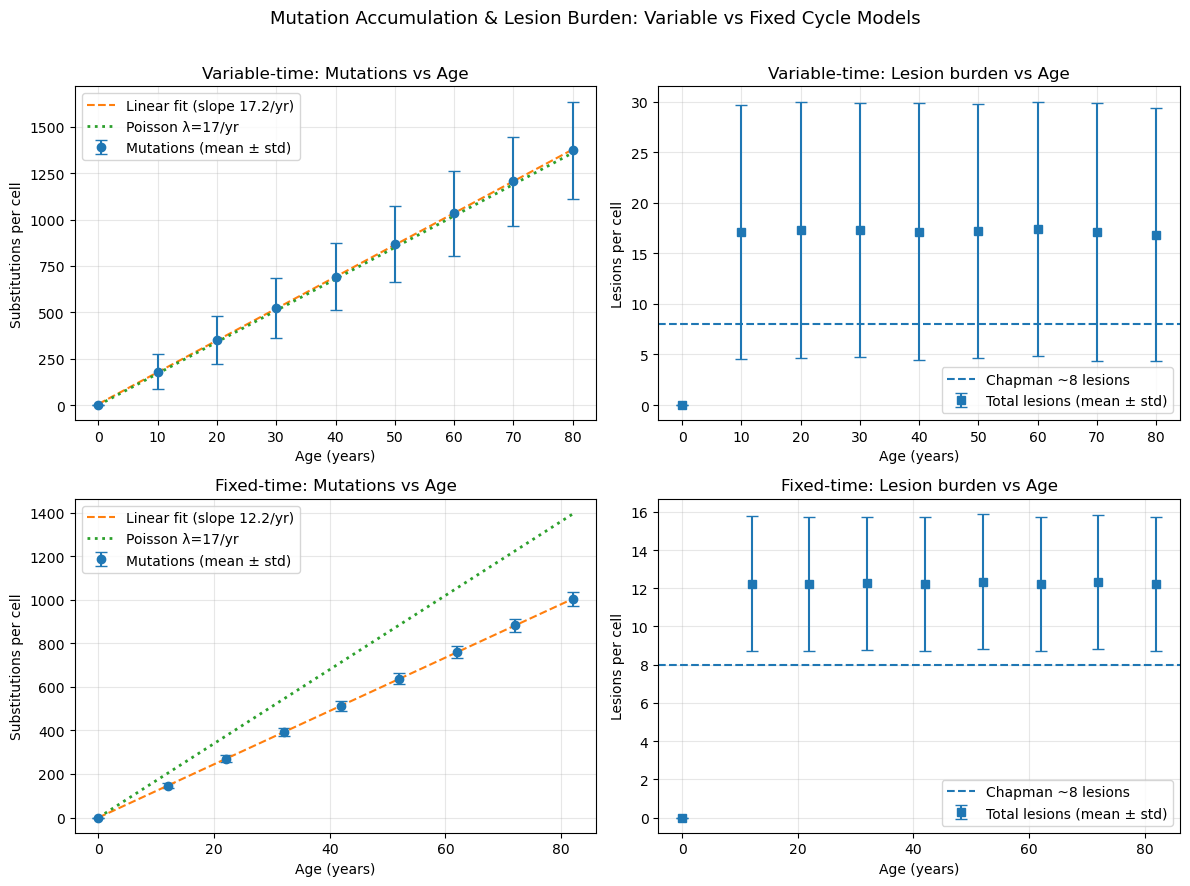

Variable-time model slope: 17.16 mutations/year
Fixed-time model slope:   12.25 mutations/year
Poisson process rate:     λ = 17.00 mutations/year


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Random generator
rng = np.random.default_rng()

# Parameters
nTrials = 5000
mitRate = 1.0            # Divisions per year
lesionRate_var = 480     # Lesions per year for variable-time model
lesionRate_fixed = 480   # Lesions per year for fixed-time model
rho_var = 3.0            # Repair rate per year for variable-time model (set as default)
rho_fixed = 3.0          # Repair rate per year for fixed-time model

# Different age ranges for each model
ages_var   = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80])   # Years for variable time
ages_fixed = np.array([0, 12, 22, 32, 42, 52, 62, 72, 82])   # Years for fixed time

# References
lambda_poisson = 17.0   # Poisson process parameter (mutations/yr)
chapman_level  = 8.0    # Chapman steady-state lesions

def simulate_cell_variable(mitRate, T, lesionRate, rho):
    t = 0.0
    mutations = 0
    totallesion = 0  # carried between cycles
    while t < T:
        # Variable cycle length
        deltaT = rng.exponential(1.0 / mitRate)
        t += deltaT
        if t > T:
            break
        # Lesion accumulation
        new_lesions = rng.poisson(lesionRate * deltaT)
        totallesion += new_lesions
        # Repair
        repaired_lesions = rng.binomial(totallesion, 1 - np.exp(-rho * deltaT))
        totallesion -= repaired_lesions
        # Replication: half become mutations
        lesions_to_mut = rng.binomial(totallesion, 0.5)
        mutations += lesions_to_mut
        totallesion -= lesions_to_mut
    return mutations, totallesion

def simulate_cell_fixed(mitRate, T, lesionRate, rho):
    t = 0.0
    mutations = 0
    totallesion = 0
    deltaT = 1.0 / mitRate  # fixed cycle length
    while t < T:
        t += deltaT
        if t > T:
            break
        new_lesions = rng.poisson(lesionRate * deltaT)
        totallesion += new_lesions
        repaired_lesions = rng.binomial(totallesion, 1 - np.exp(-rho * deltaT))
        totallesion -= repaired_lesions
        lesions_to_mut = rng.binomial(totallesion, 0.5)
        mutations += lesions_to_mut
        totallesion -= lesions_to_mut
    return mutations, totallesion

# ---- Run simulations ----
def summarize(model_func, ages, lesionRate, rho):
    mut_means, mut_stds = [], []
    les_means, les_stds = [], []
    for T in ages:
        results = [model_func(mitRate, T, lesionRate, rho) for _ in range(nTrials)]
        muts = [m for m, _ in results]
        les  = [l for _, l in results]
        mut_means.append(np.mean(muts)); mut_stds.append(np.std(muts, ddof=1))
        les_means.append(np.mean(les));  les_stds.append(np.std(les, ddof=1))
    return (np.array(mut_means), np.array(mut_stds),
            np.array(les_means), np.array(les_stds))

mut_mean_var, mut_std_var, les_mean_var, les_std_var = summarize(
    simulate_cell_variable, ages_var, lesionRate_var, rho_var
)
mut_mean_fix, mut_std_fix, les_mean_fix, les_std_fix = summarize(
    simulate_cell_fixed, ages_fixed, lesionRate_fixed, rho_fixed
)

# ---- Linear regression fits for MUTATIONS ----
coef_var   = np.polyfit(ages_var,   mut_mean_var, 1)
fit_mut_var   = np.polyval(coef_var, ages_var)
coef_fixed = np.polyfit(ages_fixed, mut_mean_fix, 1)
fit_mut_fix   = np.polyval(coef_fixed, ages_fixed)

# ---- Poisson references (mutations) ----
pois_var   = lambda_poisson * ages_var
pois_fixed = lambda_poisson * ages_fixed

# ---- Plot 2×2: (1) Var Mut, (2) Var Lesions, (3) Fixed Mut, (4) Fixed Lesions ----
fig, axes = plt.subplots(2, 2, figsize=(12, 9), sharex=False)

# (1) Variable-time mutations
ax = axes[0, 0]
ax.errorbar(ages_var, mut_mean_var, yerr=mut_std_var, fmt='o', capsize=4, label="Mutations (mean ± std)")
ax.plot(ages_var, fit_mut_var, '--', label=f"Linear fit (slope {coef_var[0]:.1f}/yr)")
ax.plot(ages_var, pois_var, ':', linewidth=2, label=f"Poisson λ={lambda_poisson:.0f}/yr")
ax.set_title("Variable-time: Mutations vs Age")
ax.set_xlabel("Age (years)"); ax.set_ylabel("Substitutions per cell")
ax.legend(); ax.grid(True, alpha=0.3)

# (2) Variable-time total lesions
ax = axes[0, 1]
ax.errorbar(ages_var, les_mean_var, yerr=les_std_var, fmt='s', capsize=4, label="Total lesions (mean ± std)")
ax.axhline(chapman_level, linestyle='--', label=f"Chapman ~{chapman_level:g} lesions")
ax.set_title("Variable-time: Lesion burden vs Age")
ax.set_xlabel("Age (years)"); ax.set_ylabel("Lesions per cell")
ax.legend(); ax.grid(True, alpha=0.3)

# (3) Fixed-time mutations
ax = axes[1, 0]
ax.errorbar(ages_fixed, mut_mean_fix, yerr=mut_std_fix, fmt='o', capsize=4, label="Mutations (mean ± std)")
ax.plot(ages_fixed, fit_mut_fix, '--', label=f"Linear fit (slope {coef_fixed[0]:.1f}/yr)")
ax.plot(ages_fixed, pois_fixed, ':', linewidth=2, label=f"Poisson λ={lambda_poisson:.0f}/yr")
ax.set_title("Fixed-time: Mutations vs Age")
ax.set_xlabel("Age (years)"); ax.set_ylabel("Substitutions per cell")
ax.legend(); ax.grid(True, alpha=0.3)

# (4) Fixed-time total lesions
ax = axes[1, 1]
ax.errorbar(ages_fixed, les_mean_fix, yerr=les_std_fix, fmt='s', capsize=4, label="Total lesions (mean ± std)")
ax.axhline(chapman_level, linestyle='--', label=f"Chapman ~{chapman_level:g} lesions")
ax.set_title("Fixed-time: Lesion burden vs Age")
ax.set_xlabel("Age (years)"); ax.set_ylabel("Lesions per cell")
ax.legend(); ax.grid(True, alpha=0.3)

plt.suptitle("Mutation Accumulation & Lesion Burden: Variable vs Fixed Cycle Models", y=0.98, fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# ---- Print slopes for comparison ----
print(f"Variable-time model slope: {coef_var[0]:.2f} mutations/year")
print(f"Fixed-time model slope:   {coef_fixed[0]:.2f} mutations/year")
print(f"Poisson process rate:     λ = {lambda_poisson:.2f} mutations/year")
